## Import libraries

In [1]:
import pickle
import sklearn
import timeit
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA, PCA
from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection  import learning_curve
from sklearn.metrics import accuracy_score

/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load data
· I deleted the 18th points for each frame as all of them are (0,0), so I used 17x2=34 input features  (not sure if it is correct to do so

In [74]:
# big_matrix = pickle.load(open("big_matrix.p", 'rb')) 
# normalized_matrix = pickle.load(open("big_matrix.p", 'rb')) 
normalized_matrix = pickle.load(open("normalized_matrix.p", 'rb')) 
rows_to_delete=np.arange(17,1440,18)
# print(rows_to_delete)
normalized_matrix = np.delete(normalized_matrix, rows_to_delete, axis=0)
X=normalized_matrix.transpose()
y=pickle.load(open("labels.p", 'rb')) 
print("X is a array contains all squats : {}".format(X.shape))
print("Y is a list to store labels : {}".format(len(y)))

X is a array contains all squats : (296, 1360)
Y is a list to store labels : 296


# PCA

In [3]:
n=15
pca=PCA(n_components=15) #PCA
X_t=pca.fit_transform(X)
print(X_t.shape)
X_range=np.arange(1,X_t.shape[1]+1,1)
print("Explained Variance for first first 10 principle components: ",pca.explained_variance_ratio_[:15])

(296, 15)
Explained Variance for first first 10 principle components:  [0.55707698 0.14746327 0.05348863 0.02069305 0.01759905 0.01520996
 0.01228379 0.01136201 0.01007989 0.00882089 0.00810265 0.00719484
 0.00671012 0.005864   0.0055323 ]


Text(0, 0.5, 'Percentage of variance explained')

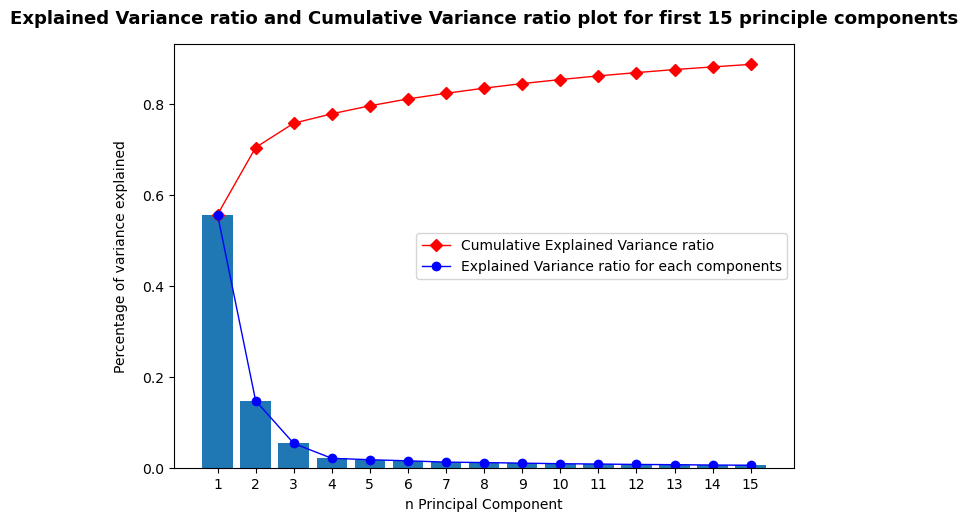

In [4]:
# fig, axarr = plt.subplots(2, 4, figsize=(12, 6))
plt.figure(figsize=(8,5.5))
plt.plot(X_range, np.cumsum(pca.explained_variance_ratio_[:15]),marker="D",c="red",linewidth=1,label="Cumulative Explained Variance ratio")
plt.bar(X_range,pca.explained_variance_ratio_[:15])
plt.plot(X_range, pca.explained_variance_ratio_[:15],marker="o",c="blue",linewidth=1,label="Explained Variance ratio for each components")
plt.legend(loc='center right')
plt.xticks(X_range)
plt.title("Explained Variance ratio and Cumulative Variance ratio plot for first 15 principle components",fontsize = 13,y=1.03,fontweight = 'bold')
plt.xlabel('n Principal Component', fontsize = 10)
plt.ylabel('Percentage of variance explained', fontsize = 10,labelpad=10)

In [5]:
# plt.figure(figsize=(8,5.5))

# color= ['red' if l =="correct" else "pink" if l =="incorrect_out_knees" else "blue" if l =="incorrect_lean_fwd" else "purple" if l =="incorrect_not_low" else "red" if l =="incorrect_chin_tuck" else "yellow" if l =="incorrect_feet_close" else 'green' for l in y]
# plot=plt.scatter(X_t[:,0],X_t[:,1],c=color,cmap=plt.cm.coolwarm, alpha=1,marker=".",s=2,)
# clb = plt.colorbar(plot)
# plt.xlabel("first principle component", fontsize=12)
# plt.ylabel("second principle component", fontsize=12)
# plt.title('2D PCA of Fashion-MNIST dataset', fontweight = 'bold', fontsize=15)
# plt.show()

# Split the dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(236, 15)
(60, 15)


# SVM

In [61]:
models=[]
accuracies = []
training_times=[]
for degree in range(1, 5):
    models.append(SVC(kernel='poly', degree=degree, gamma='auto'))
for model in models:
    start = timeit.default_timer()
    model.fit(X_train,y_train)
    stop = timeit.default_timer()
    y_pred = model.predict(X_test)
    print(f'My first SVM classifier training_set accuracy: {model.score(X_train,y_train)}')
    print(f'My first SVM classifier training_set accuracy: {model.score(X_test,y_test)}')
    print(f'My first SVM classifier test_set accuracy: {accuracy_score(y_test, y_pred)}')
    accuracies.append(accuracy_score(y_test, y_pred))
    time=stop-start
    training_times.append(time)


My first SVM classifier training_set accuracy: 0.9364406779661016
My first SVM classifier training_set accuracy: 0.7
My first SVM classifier test_set accuracy: 0.7
My first SVM classifier training_set accuracy: 1.0
My first SVM classifier training_set accuracy: 0.6833333333333333
My first SVM classifier test_set accuracy: 0.6833333333333333
My first SVM classifier training_set accuracy: 1.0
My first SVM classifier training_set accuracy: 0.7333333333333333
My first SVM classifier test_set accuracy: 0.7333333333333333
My first SVM classifier training_set accuracy: 1.0
My first SVM classifier training_set accuracy: 0.6666666666666666
My first SVM classifier test_set accuracy: 0.6666666666666666


['Degree 1', 'Degree 2', 'Degree 3', 'Degree 4']


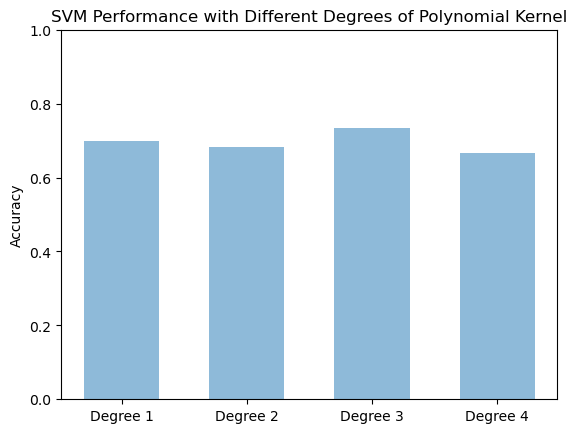

In [62]:
#plot the results in a bar chart
x_labels = [f"Degree {degree}" for degree in range(1, 5)]
print(x_labels)
x_pos = np.arange(len(x_labels))
plt.bar(x_pos, accuracies, 0.6,align='center', alpha=0.5)
plt.xticks(x_pos, x_labels)
plt.ylabel('Accuracy')

plt.title('SVM Performance with Different Degrees of Polynomial Kernel')
plt.ylim(0,1)
plt.show()

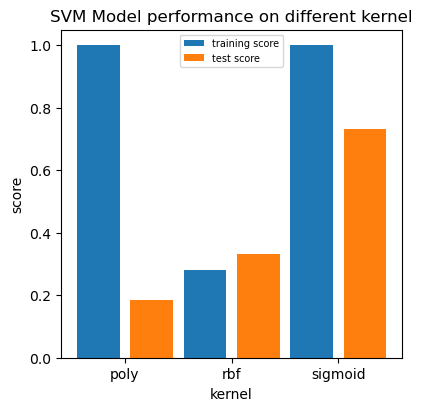

In [63]:
models=[]
accuracies = []
training_times=[]
kernels=['rbf','sigmoid','poly']
for i in range(len(kernels)):
    models.append(SVC(kernel=kernels[i],gamma='auto'))

n=len(kernel)
training_score=[]
test_score=[]
times=[]
for i in range(n):
    model = models[i]
    start = timeit.default_timer()
    model.fit(X_train, y_train)
    stop = timeit.default_timer()
    model.fit(X_train,y_train)
    r1 = model.score(X_train, y_train)
    training_score.append(r1)
    r2 = model.score(X_test, y_test)
    test_score.append(r2)
    time=stop-start
    times.append(time)

X_axis=np.arange(n)
plt.figure(figsize=(4,4), layout='constrained')
plt.bar(X_axis-0.25, training_score,0.4, label='training score') 
plt.bar(X_axis+0.25, test_score, 0.4,label='test score')  
plt.xlabel('kernel')
plt.xticks(X_axis,kernel)
plt.ylabel('score')
plt.title("SVM Model performance on different kernel")
plt.legend(fontsize=7); 

# plt.figure(figsize=(4,4), layout='constrained')
# plt.bar(X_axis, times, 0.5,label='second') 
# plt.xlabel('kernel')
# plt.xticks(X_axis,kernel)
# plt.ylabel('second')
# plt.title("training time with different kernel")
# plt.legend(fontsize=7);  

/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


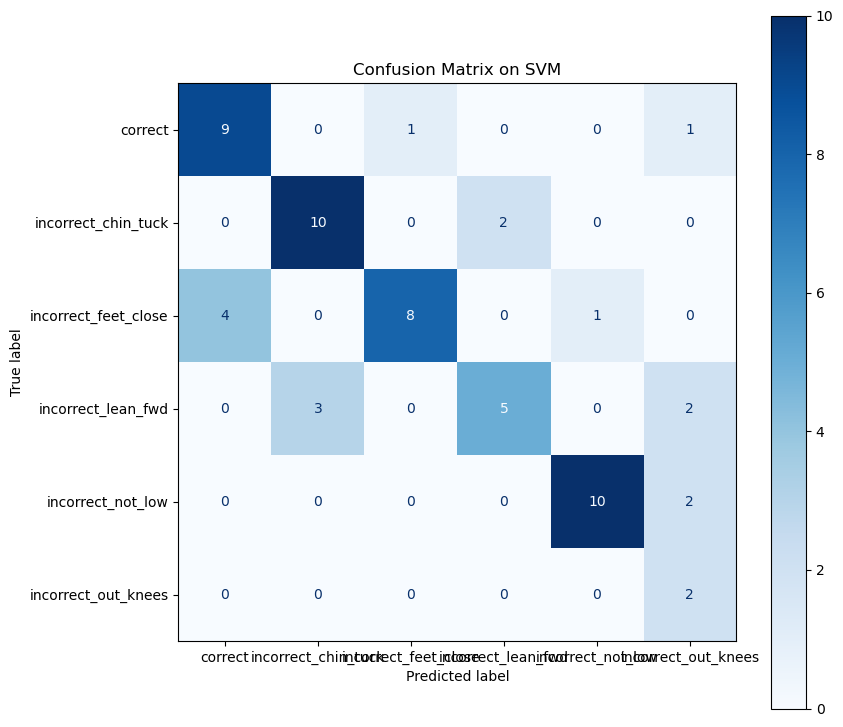

In [65]:
model=SVC(kernel='poly',gamma='auto')
model.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(model, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on SVM")
title = "Confusion Matrix"

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [483]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {clf.score(X_train, y_train)}")
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
Accuracy: 0.5


In [68]:
model = DecisionTreeClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  0.8138297872340425


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


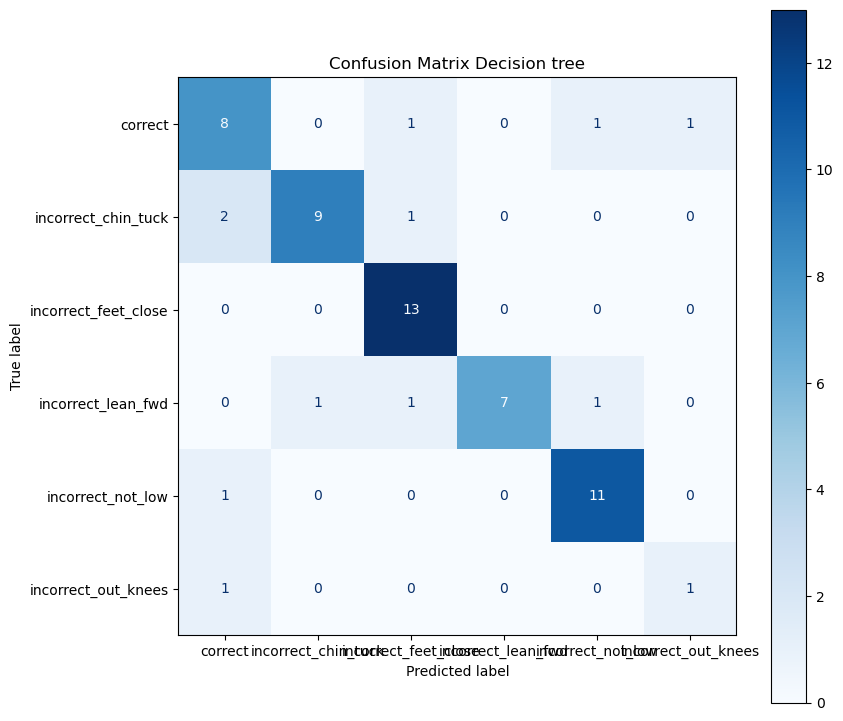

In [70]:
model = DecisionTreeClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(model, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix Decision tree")
title = "Confusion Matrix"

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate

/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning:

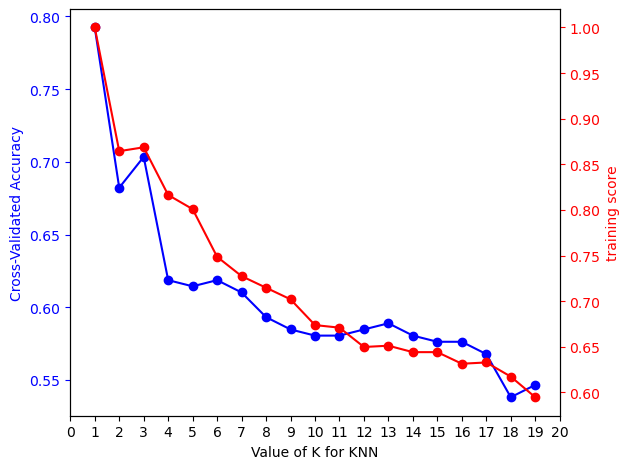

In [62]:
k_range = range(1, 20)
# Empty list to store cross-validation scores
k_scores = []
k_scores_training=[]

# Perform cross-validation for each k value
# CV=4
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=4, scoring='accuracy', return_train_score=True)
    k_scores.append(np.mean(scores['test_score']))
    k_scores_training.append(np.mean(scores['train_score']))

# Plot the accuracy 
fig, ax1 = plt.subplots()

ax1.plot(k_range, k_scores, color='blue',marker='o')
ax1.set_xlabel('Value of K for KNN')
ax1.set_ylabel('Cross-Validated Accuracy', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(k_range,k_scores_training, color='red',marker='o')
ax2.set_ylabel('training score', color='red')
ax2.tick_params('y', colors='red')

xticks = np.arange(0, 21, 1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)

fig.tight_layout()
plt.show()

/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


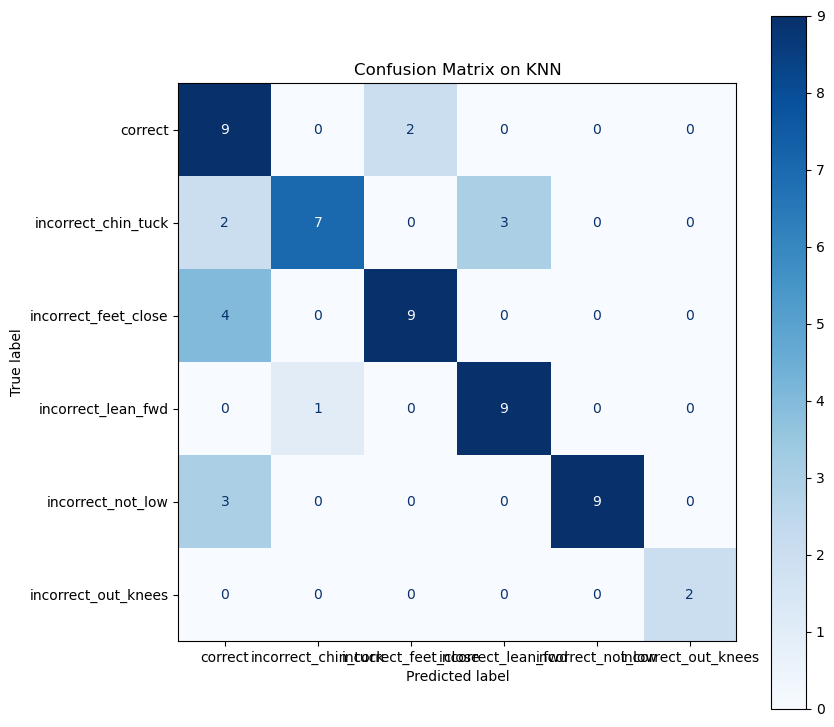

In [63]:
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(knn_best, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on KNN")
title = "Confusion Matrix"

# ANN

In [479]:
from sklearn.neural_network import MLPClassifier

In [480]:
clf = MLPClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {clf.score(X_train, y_train)}")
print(f"Accuracy: {accuracy}")

Accuracy: 0.847457627118644
Accuracy: 0.65


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


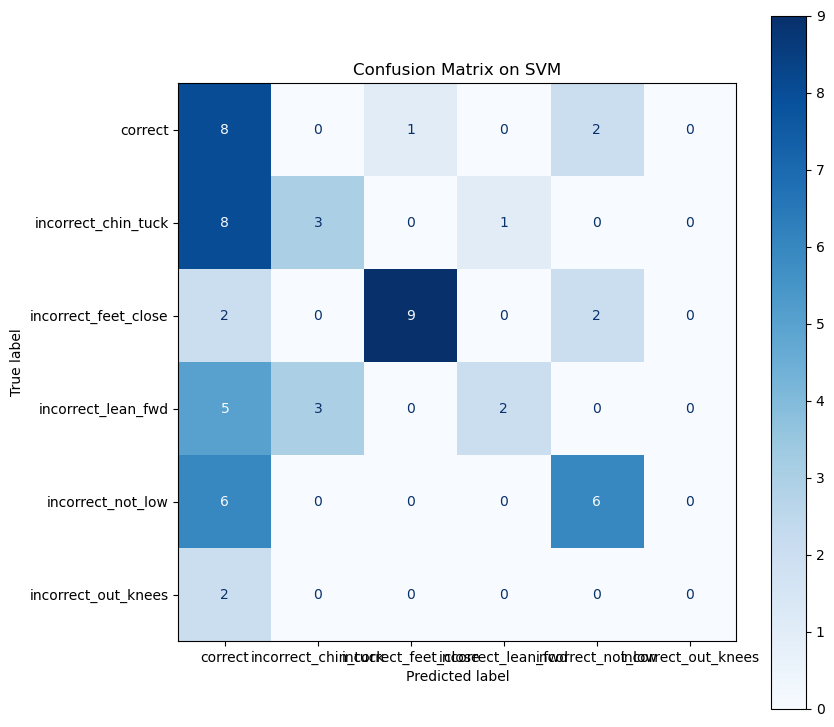

In [481]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on ANN")
title = "Confusion Matrix"